In [2]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('sickleave_personType.csv')
df

,PersonType,OrganizationLevel,avg_sickleavehours,Shift_Name
0,EM,1,20,Day
1,EM,1,25,Day
2,EM,1,40,Day
3,EM,1,52,Day
4,EM,1,69,Day
...,...,...,...,...
88,EM,4,68,Night
89,EM,4,69,Night
90,SP,2,27,Day
91,SP,2,30,Day


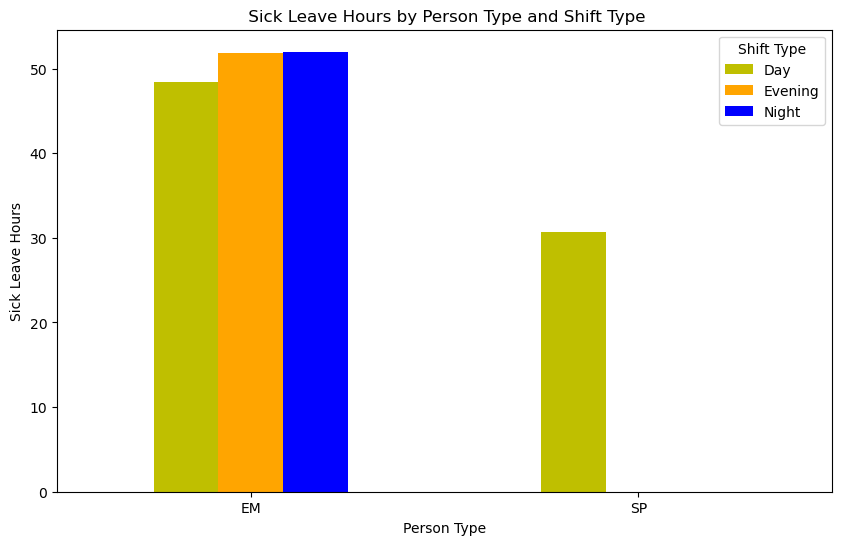

In [4]:
pivot_df = df.pivot_table(index='PersonType', columns='Shift_Name', values='avg_sickleavehours')

# Plotting
pivot_df.plot(kind='bar', figsize=(10, 6), color=('y', 'orange', 'blue'))

# Add labels and title
plt.xticks(rotation = 360)
plt.xlabel('Person Type')
plt.ylabel('Sick Leave Hours')
plt.title(' Sick Leave Hours by Person Type and Shift Type')

# displaying legend
plt.legend(title='Shift Type')

plt.show()

In [5]:
import scipy.stats as stats

# Assuming `df` is your DataFrame
# Pivot the data to have job titles as columns and sick leave hours as values
pivot_df = df.pivot(columns='PersonType', values='avg_sickleavehours')

# Perform ANOVA
anova_result = stats.f_oneway(*[pivot_df[col].dropna() for col in pivot_df])
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 6.012152652929106, p-value: 0.016116171053067688


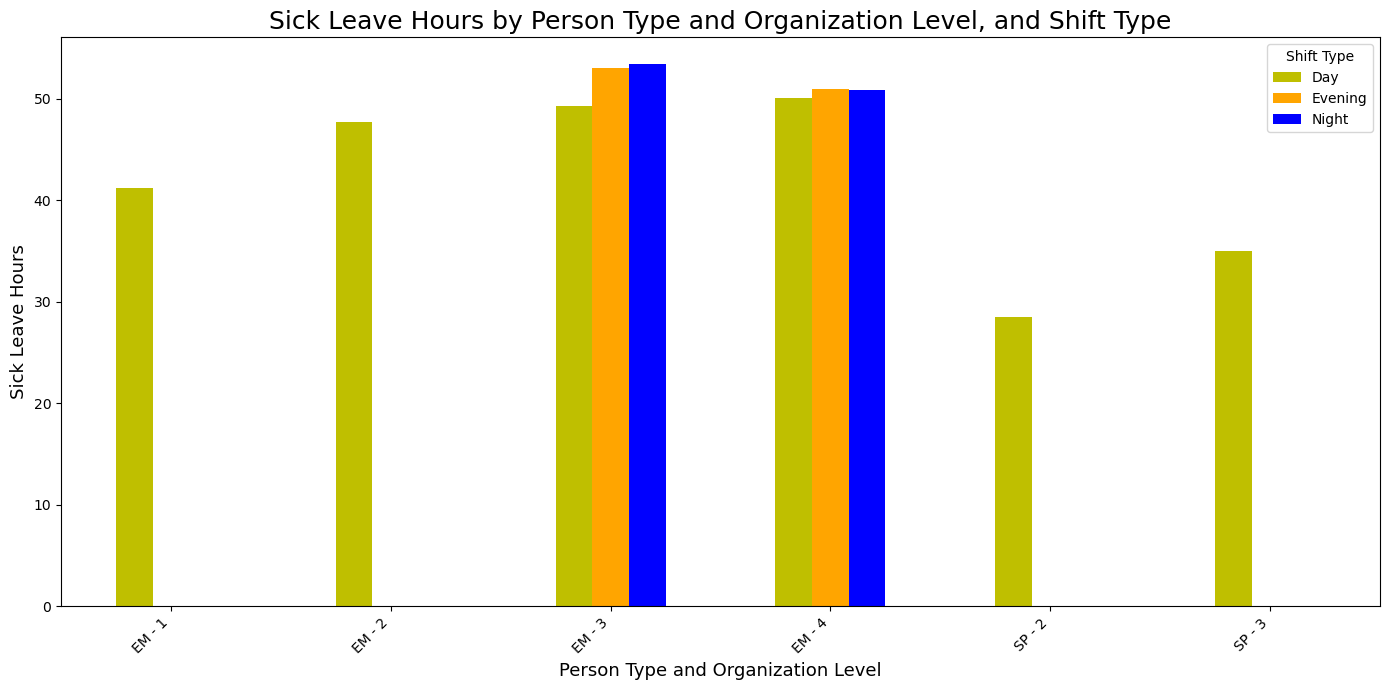

In [13]:
df['PersonType_OrgLevel'] = df['PersonType'] + ' - ' + df['OrganizationLevel'].astype(str)

# Pivot the table to include 'PersonType_OrgLevel'
pivot_df = df.pivot_table(index='PersonType_OrgLevel', columns='Shift_Name', values='avg_sickleavehours')


fig, ax = plt.subplots(figsize=(14, 7))

# Define colors for the bars
colors = ['y', 'orange', 'blue']

# Plot each shift type
pivot_df.plot(kind='bar', ax=ax, color=colors)

# Adding  labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Person Type and Organization Level', fontsize= 13)
plt.ylabel('Sick Leave Hours', fontsize= 13)
plt.title('Sick Leave Hours by Person Type and Organization Level, and Shift Type', fontsize=18)

# displaying legend
plt.legend(title='Shift Type')

plt.tight_layout()
plt.show()

In [9]:
import scipy.stats as stats

# Pivot the data to have Shift name as columns and sick leave hours as values
pivot_df = df.pivot(columns=['Shift_Name'], values='avg_sickleavehours')

# Perform ANOVA
anova_result = stats.f_oneway(*[pivot_df[col].dropna() for col in pivot_df])
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 1.2295212685575545, p-value: 0.29729684129795453
